In [90]:
import random
import numpy as np
import matplotlib.pyplot as plt

This notebook contains solutions to various probability problems that we are able to simulate using `NumPy` and the `random` module. 

### 1. Rolling two dice

Two unbiased dice are thrown once and the total score is observed. Use a simulation to find the estimated probability that the total score is even or greater than 7?

In [65]:
def dice_rolls(n_simulations = 100000):
    count = 0
    for i in range(n_simulations):
        die1 = np.random.randint(1, 7)
        die2 = np.random.randint(1, 7)
        score = die1 + die2
        if score > 7 or score % 2 == 0:
            count += 1
    return count / n_simulations

In [66]:
dice_rolls()

0.66571

In this problem, we first initialize a count to 0, since we need to record how many rolls meet our condition.  We define `n_simulations` in the argument to equal 100,000, so we loop through the number of simulations we have set.  We use NumPy to simulate two dice rolls and make them a random integer between 1 and 6.  We add the two rolls together and if the score meets our conditions, add one to the count.  Finally, we return the total count divided by the number of simulations to get our probability. 

### 2. Balls in an urn 

An urn contains 10 white balls, 20 reds and 30 greens. Draw 5 balls with replacement.  What is the probability of:

a. drawing two white and three red?

b. all five are the same color? 

In [40]:
from collections import Counter 
def two_white_three_red(n_simulations=1000000):
    count = 0
    urn = ['w'] * 10 + ['r'] * 20 + ['g'] * 30
    for i in range(n_simulations):
        draw = Counter(np.random.choice(urn, replace=True, size=5))
        if draw['w'] == 2 and draw['r'] == 3:
            count += 1
    return count / n_simulations 

In [41]:
two_white_three_red()

0.010363

In [34]:
from collections import Counter 
def same_color(n_simulations=100000):
    count = 0
    urn = ['w'] * 10 + ['r'] * 20 + ['g'] * 30
    for i in range(n_simulations):
        draw = Counter(np.random.choice(urn, replace=True, size=5))
        if draw['w'] == 5 or draw['r'] == 5 or draw['g'] == 5:
            count += 1
    return count / n_simulations 

In [35]:
same_color()

0.03649

### 3. Two of the same number 

Suppose you have two six-sided standard dice and you win a prize if the dice show the same number.  Write a program to simulate what the probability of winning would be. 

In [67]:
def two_numbers(n_simulations=100000):
    count = 0
    for i in range(n_simulations):
        die1 = np.random.randint(1, 7)
        die2 = np.random.randint(1, 7)
        if die1 == die2:
            count += 1
    return count / n_simulations

In [68]:
two_numbers()

0.16535

In this problem, much like with the first problem, we initialize a count to zero.  We loop through the number of simulations and roll two dice.  If the dice are equal, we increment the count by one.  Finally, we return the count divided by the total number of simulations.  Since there are only 36 total combinations with two six-sided dice, only six of those will be matching, for a probability of 0.167 

### 4. Lottery payoff

Suppose there is a lottery with a \\$1,000,000 jackpot and a total of 1,000,000 tickets bought with no more allowed.  Each ticket costs $5.  Write a function to determine the expected payoff for each lottery ticket.  

In [25]:
def expected_payoff():
    num_sims=10000000
    ticket_cost = 5
    num_tickets = 1000000
    jackpot = 1000000
    win_pct = 1 / num_tickets
    payoffs = [-ticket_cost, jackpot-ticket_cost]
    probs = [1-win_pct, win_pct]
    
    outcomes = np.random.choice(a=payoffs, size=num_sims, p=probs, replace=True)
    return outcomes.mean()

(array([ 2.,  5.,  6., 27., 13., 20., 17.,  3.,  5.,  2.]),
 array([-4.8 , -4.64, -4.48, -4.32, -4.16, -4.  , -3.84, -3.68, -3.52,
        -3.36, -3.2 ]),
 <a list of 10 Patch objects>)

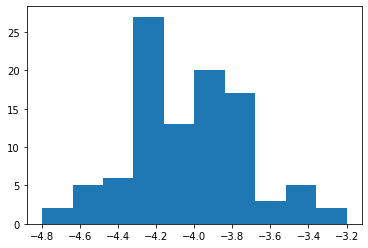

In [27]:
n_sims = 100
outcomes = []
for i in range(n_sims):
    outcomes.append(expected_payoff())
plt.hist(outcomes)

In [29]:
sum(outcomes) / len(outcomes)

-4.04

So we see that for a \\$5 ticket, we expect to lose about $4.  

### 5. Birthday problem 

How many people do we need in a room to ensure that there is 80% chance so that two of the people share the same birthday? 

### 6. Monty Hall problem 

You’re on a gameshow with Monty Hall. There are three doors in front of you, two have goats behind them and one has a car. After you pick a door, Monty opens another door, revealing a goat. He then gives you the option of switching. Should you switch?

In [91]:
def monty_hall(n_simulations=100000):
    stay_results = []
    switch_results = []
    for i in range(n_simulations):
        doors = ['car', 'goat', 'goat']
        random.shuffle(doors)
        door_index = random.choice([0, 1, 2])
        stay_result = doors.pop(door_index)
        doors.remove('goat')
        switch_result = doors[0]
        stay_results.append(stay_result)
        switch_results.append(switch_result)
    stay_pct = stay_results.count('car') / n_simulations
    switch_pct = switch_results.count('car') / n_simulations
    print(f'Stay results: {stay_pct}')
    print(f'Switch results: {switch_pct}')

In [86]:
monty_hall()

Stay results: 0.3345
Switch results: 0.6655


In this problem, we create two empty lists for our stay and switch results.  We loop through the number of simulations and create a list containing the items behind each of the three doors.  We shuffle the doors and select a door at random.  For whichever door we choose, we use `pop` to remove the index from the list and save it as `stay_result`.  According to the prompt, Monty reveals that a goat is behind one of the two remaining doors after we have picked our door.  So we use `remove()` to remove a goat from `doors`.  We now have only one remaining door, `door[0]`, which is the result of us switching.  We save the results of save and the results of switch and count how many times `car` showed up in each.  As we see from the results, switching results in a 2-to-1 favorite for winning the car. 

### 7. Three girls 

If there is a family of four children, what is the chance that family will consist of exactly three girls and one boy?

In [104]:
def three_girls(n_simulations=100000):
    gender = ['M', 'F']
    girls_count = 0
    for i in range(n_simulations):
        kids = random.choices(gender, 4)
        if kids.count('F') == 3:
            girls_count += 1
    return girls_count / n_simulations

In [105]:
three_girls()

TypeError: 'int' object is not iterable

### 8. Wardrobe selection 

Suppose Charlie has 3 pairs of shoes, 4 different coats, and 2 different pants to wear in his wardrobe. Of those items, Charlie has exactly one pair of white shoes, exactly one black coat, and exactly one pair of khaki pants. If Charlie selects each item of his wardrobe at random, what is the probability that he will wear the white shoes, black coat, and khaki pants?

In [ ]:
def wardrobe():
    